In [14]:
#Machine Learning Coursera Assignment 1 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [15]:
# ==================== Part 1: Basic Function ====================
df=pd.read_csv("ex1data1.txt",sep=",",engine='python')
df.head()
y=df["profit"].to_frame()
X=df.drop(["profit"],axis=1)

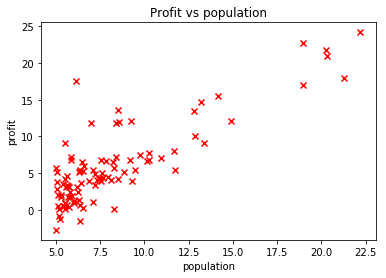

In [16]:
#======================= Part 2: Plotting =======================
plt.scatter(df["population"],df["profit"],marker='x',color="red",linewidths=1)
plt.title("Profit vs population")
plt.xlabel("population")
plt.ylabel("profit")
plt.show()

In [17]:
# =================== Part 3: Cost and Gradient descent ===================
ones = pd.DataFrame(np.ones((len(X), 1)))
X=pd.concat([ones, X], axis=1)

In [18]:
theta=np.zeros((2,1))
iterations=1500
alpha=0.01

In [19]:
# Cost Function
def computeCost(X,y,theta):
    m=len(y)
    J=0
    h=X.dot(theta)
    z=h.subtract(y['profit'], axis=0)
    square=np.square(z)
    sum=square.sum()
    J=sum/(2*m)
    return J

In [20]:
# compute and display initial cost
J=computeCost(X,y,theta)
print("With theta = [0 ; 0] Cost computed =", J.values[0]);
print('Expected cost value (approx) 32.07');

With theta = [0 ; 0] Cost computed = 32.072733877455676
Expected cost value (approx) 32.07


In [21]:
# further testing of the cost function
theta=np.array([[-1], [2]])
J = computeCost(X, y,theta);
print("With theta = [0 ; 0] Cost computed =", J.values[0]);
print('Expected cost value (approx) 54.24');

With theta = [0 ; 0] Cost computed = 54.24245508201238
Expected cost value (approx) 54.24


In [22]:
#Gradient Descent
def gradientDescent(X,y,theta,alpha,iterations):
    m=len(y)
    J_history=np.zeros((iterations+1,1))
    for i in range(iterations):
        h=X.dot(theta)
        z=h.subtract(y['profit'], axis=0)
        Xz=X.T.dot(z)
        theta=theta-((alpha/m)*Xz)
        J_history[iterations] = computeCost(X, y, theta);     
    return theta,J_history

In [23]:
#run gradient descent
theta=np.zeros((2,1))
theta,J_history=gradientDescent(X,y,theta,alpha,iterations)
# print theta to screen
print('Theta found by gradient descent: ', theta.values[:]);
print('Expected theta values (approx): -3.6303  1.1664');

Theta found by gradient descent:  [[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx): -3.6303  1.1664


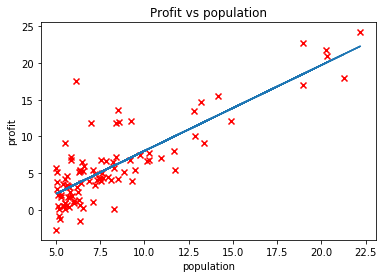

In [24]:
# Plot the linear fit
plt.scatter(df["population"],df["profit"],marker='x',color="red",linewidths=1)
plt.plot(X["population"],X.dot(theta))
plt.title("Profit vs population")
plt.xlabel("population")
plt.ylabel("profit")
plt.show()

In [25]:
#  Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([[1], [3.5]]).T.dot(theta)
predict2 = np.array([[1], [7]]).T.dot(theta)

print('For population = 35,000, we predict a profit of',predict1*10000);
print('For population = 70,000, we predict a profit of',predict2*10000);

For population = 35,000, we predict a profit of [[4519.7678677]]
For population = 70,000, we predict a profit of [[45342.45012945]]
